# Object-oriented programming

# The big reveal

So far we've been working with functions and packages of functions, as well as defining our own functions.  It turns out, though, that we've been working with objects all along, we just haven't recognize them as such. For example,

In [1]:
x = 'Hi'
x.lower()

'hi'

The string `x` is an object that we can send messages to.

In [2]:
print( type(x) )

<class 'str'>


Even integers are objects:

In [3]:
print(dir(99))

['__abs__', '__add__', '__and__', '__bool__', '__ceil__', '__class__', '__delattr__', '__dir__', '__divmod__', '__doc__', '__eq__', '__float__', '__floor__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getnewargs__', '__gt__', '__hash__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__le__', '__lshift__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rlshift__', '__rmod__', '__rmul__', '__ror__', '__round__', '__rpow__', '__rrshift__', '__rshift__', '__rsub__', '__rtruediv__', '__rxor__', '__setattr__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', '__xor__', 'bit_length', 'conjugate', 'denominator', 'from_bytes', 'imag', 'numerator', 'real', 'to_bytes']


A *class* is the blueprint for an object and is basically the name of the type, `str` in this case. An object is called an *instance* of the class.

In `x.lower()` we are sending the `lower` message to the `x` string object. Messages are really just functions associated with classes/objects.

In [4]:
x.lower

<function str.lower()>

In a language that does not support object learning programming, we would do something like:

```python
lower(x)
```

Python has both functions and object reprogramming which is why there is both `x.lower()` and:

In [5]:
len(x)

2

The choice of function or "message" is up to the library designer, but `lower` only makes sense for strings so it makes sense to group it with the definition of `str`.

In terms of implementation, however, `x.lower()` is actually implemented as `str.lower(x)` where `str` is the class definition for strings. Computer processors understand function calls; they do not understand objects and so we performed this translation within the Python interpreter itself.

# Package vs object members

Let's get another thing straight. The dot `.` operator is overloaded in Python to mean both package member and object member access.  You are familiar with this already:

In [6]:
import numpy as np
np.array([1,2,3])

array([1, 2, 3])

In [7]:
import math
math.log(3000)

8.006367567650246

This is a common point of confusion when reading code. When we see `a.f()`, we don't know whether that function `f` is a member of the package identified by `a` or an object referred to by `a`.

In the wordsim project, you defined a file called `wordsim.py` and then my `test_wordsim.py` file did `from wordsim import *` to pull in all your functions in `wordsim.py`.

## Exercise

In the following, identify the *identifiers* (words) as package or function or field:

1. `np.log(3)`
1. `np.linalg.norm(v)`
1. `from sklearn.ensemble import RandomForestRegressor`
1. `pd.read_csv("foo.csv")`
1. `pd.read_csv`
1. `'hi'.lower()`
1. `'hi'.lower`
1. `df_train.columns`
1. `np.pi`
1. `img = img.convert("L")`

Now, identify the data types of subexpressions and identify the *identifiers* (words) as package or function or field:

1. `df["saledate"].dt.year`
1. `df_train.isnull().any().head(60)`

# Fields versus methods

Objects have functions, which we call *methods* to distinguish them from functions not associated with objects. Objects also have variables, which we call *fields* or *instance variables*.  

Fields are the *state* of the object.  Methods are the *behavior* of the object.

We've also been using fields all along, such as `df.columns` that gets the list of columns in a data frame.

In [8]:
import datetime
now = datetime.date.today()
print( type(now) )
print( now.year ) # access field year
print( now.month )

<class 'datetime.date'>
2019
8


If you try to access an objects function without the parentheses, the expression evaluates to the function object itself instead of calling it:

In [9]:
s='hi'
s.title

<function str.title()>

# A simple class definition

A class is a blueprint for multiple objects, often called *instances*.  The class *encapsulates* the state and behavior of an object.

Imagine an alien lands in your backyard and asks you to describe a car. You would probably describe its attributes, such as the number of wheels, and its functionality, such as can start and stop. These are the state and behavior. By defining them, we effectively define the object. The class name is just giving a name to the entity.

By convention, class names should be capitalized like `Point`.

## Tuples as object substitutes

The fields of an object are the data items we want to associate together. For example, if I want to track book titles/authors, I can use a list of tuples:

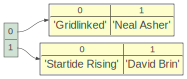

In [10]:
from lolviz import *
books = [
    ('Gridlinked', 'Neal Asher'),
    ('Startide Rising', 'David Brin')
]

objviz(books)

In [11]:
for b in books:
    print(f"{b[1]}: {b[0]}")

Neal Asher: Gridlinked
David Brin: Startide Rising


In [12]:
# Or, more fancy
for title, author in books:
    print(f"{author}: {title}")

Neal Asher: Gridlinked
David Brin: Startide Rising


To access the elements of the tuple in both cases, we have to keep track of the order in our heads. In other words, we have to access the tuple elements like they are list elements, which they are.

## Formal objects

A better way is to formally declare that author and title data elements should be encapsulated into a single entity called a book. Python has what I consider an extremely quirky specification but it is extremely flexible. For example, we can define an object that has no methods and no fields but then can add fields dynamically with assignment statements:

Gridlinked Neal Asher


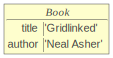

In [13]:
class Book:
    pass

b = Book()
print(b)
b.title = 'Gridlinked'
b.author = 'Neal Asher'
print(b.title, b.author)
objviz(b)

But this doesn't let us define methods associated with that object (easily). Let's take a look at our first real class definition that contains a function called a *constructor*.

In [14]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        self.chapters = []

The constructor typically sets initial and default field values based upon the arguments.

All methods, functions defined within an object, must have an explicit first argument called `self`.  This is the object under consideration.

Then we can make a list of book objects or instances of class `Book` using instance creation syntax `Book(...,...)`:

In [15]:
books = [
    Book('Gridlinked', 'Neal Asher'),
    Book(title='David Brin', author='Startide Rising')
]

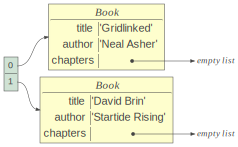

In [16]:
objviz(books)

In [17]:
for b in books:
    print(f"{b.author}: {b.title}") # access fields

Neal Asher: Gridlinked
Startide Rising: David Brin


Notice that we do not pass the `self` parameter to the constructor. **It's implicit at the call site but explicit at the definition site!**

## Naughty behavior

Also notice that we have been setting fields of objects using the constructor, by Python in its infinite flexibility allows you to do very **naughty** things such as setting fields on arbitrary objects:

In [18]:
class Foo:
    pass # just says "empty"

x = Foo()
x.foo = 3

That does not get an error even though the class itself does not define foo!

You can even [add methods on the fly](https://stackoverflow.com/questions/972/adding-a-method-to-an-existing-object-instance).

# Defining methods

If you try to print out a book you will see just the type information and the physical memory address:

In [19]:
print(books[0])

In [20]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        
    def __str__(self): # called when conversion to string needed like print
        return f"Book({self.title}, {self.author})"
    
    def __repr__(self): # called in interactive mode
        return self.__str__() # call the string
    
books = [
    Book('Gridlinked', 'Neal Asher'),
    Book('Startide Rising', 'David Brin')
]

In [21]:
print(books[0]) # calls __str__()
books[0]        # calls __repr__()

Book(Gridlinked, Neal Asher)


Book(Gridlinked, Neal Asher)

Make sure that you use `self.x` to refer to field `x`, otherwise you are creating a local variable inside a method:

In [22]:
class Foo:
    def __init__(self):
        self.x = 0
    def foo(self):
        x = 3 # WARNING: does not alter the field! should be self.x

Let's create another method that sets the count of book sold.

In [23]:
class Book:
    def __init__(self, title, author):
        self.title = title
        self.author = author
        self.sold = 0 # set default
        
    def sell(self, n):
        self.sold += n
        
    def __str__(self): # called when conversion to string needed like print
        return f"Book({self.title}, {self.author}, sold={self.sold})"
    
    def __repr__(self): # called in interactive mode
        return self.__str__() # call the string

In [24]:
b = Book('Gridlinked', 'Neal Asher')
print(b)
b.sell(100) # Book.sell(b, 100)
print(b)

Book(Gridlinked, Neal Asher, sold=0)
Book(Gridlinked, Neal Asher, sold=100)


**Note**: that from *within* a method definition, we call other methods on the same object using `self.foo(...)` for method `foo`.

## The key to understanding methods versus functions

`b.sell(100)` **method call** is translated and executed by the Python interpreter as **function call** `Book.sell(b,100)`. `b` becomes parameter `self` and so the `sell()` function is updating book `b`.

Why we prefer `b.sell(100)` over `Book.sell(b,100)`: Instead of just functions, we send messages back and forth between objects. Instead of bark(dog) we say dog.bark() or instead of inflate(ball) we say ball.inflate().

## Exercise

Real-world objects contain ... and ...

A software object's state is stored in ...

A software object's behavior is exposed through ...

A blueprint for a software object is called a ...

## Exercise

Define a class called `Point` that has a constructor taking x, y coordinates and make them fields of the class.

Define method `distance(q)` that takes a `Point` and returns the Euclidean distance  from `self` to `q`.

Test with

```
p = Point(3,4)
q = Point(5,6)
print(p.distance(q))
```

Add method `__str__` so that `print(q)` prints something nice like `(3,4)`.

### Solution

In [41]:
import numpy as np

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 + (self.y - other.y)**2 )
    
    def __str__(self):
        return f"({self.x},{self.y})"

In [26]:
p = Point(3,4)
q = Point(5,6)
print(p, q)
print(p.distance(q))

(3,4) (5,6)
2.8284271247461903


# Inheritance

Defining something new as it relates to something we already understand is usually a lot easier. The same thing is true in programming. Let's start with an account object:

In [27]:
class Account:
    def __init__(self, starting):
        self.balance = starting

    def add(self, value):
        self.balance += value

    def total(self):
        return self.balance

In [28]:
a = Account(100.0)
a.add(15)
a.total()

115.0

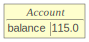

In [29]:
objviz(a)

Inheritance behaves like an `import` or include operation from another class into a new class. (*Note that this is not really true, but we can think of it as an include for our purposes.*)

If we do not specify a superclass, class `object` is the implicit superclass.  That class is called the root of the class hierarchy and defines a number of standard methods:

In [30]:
x = object() # yes, we can make a generic object
print(dir(x))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__']


We could define an interest-bearing account as it differs from a regular account:

In [31]:
class InterestingAccount(Account): # derive from super class to get subclass
    def __init__(self, starting, rate):
        self.balance = starting # super().__init__(starting)
        self.rate = rate
    def total(self): # OVERRIDE method
        return self.balance + self.balance * self.rate

b = InterestingAccount(100.0, 0.15)
b.add(15)
b.total()

132.25

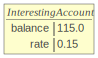

In [32]:
objviz(b)

The key is that we get to use `add()` without having to redefine it in `InterestingAccount` and `InterestingAccount` also gets to override what the `total()` of the account is.  We have *reused* and *refined* previous functionality. You can think of the superclass as defining some initial functions that we can reuse or override in the subclass.

We can also *extend* the functionality by adding a method that is not in the superclass.

In [33]:
class InterestingAccount(Account): # derive from super class to get subclass
    def __init__(self, starting, rate):
        super().__init__(starting) # does self.balance = starting above
        self.rate = rate

    def total(self): # OVERRIDE method
        return self.balance + self.balance * self.rate
    
    def profit(self):
        return self.balance * self.rate

In [34]:
b = InterestingAccount(100.0, 0.15)
b.add(15)
b.profit()

17.25

In [35]:
a = Account(100.0)
b = InterestingAccount(100.0, 0.15)
print(type(a))
print(type(b))

<class '__main__.Account'>
<class '__main__.InterestingAccount'>


The class definitions are actually objects themselves that you can access with a secret field of any object:

In [36]:
print(b.__class__)
print(b.__class__.__base__)

<class '__main__.InterestingAccount'>
<class '__main__.Account'>


## Exercise

1. What is a class?
1. What's the difference between a class and an instance?
1. Define a new instance of class `Foo` using a constructor that takes no arguments.
1. What is the syntax to access a field of an object?
1. How does a method differ from a function?
1. What does the `__init__` method do?
1. Given classes `Employee` and `Manager`, which is the superclass in which is the subclass?
1. Can a method in a subclass call a method defined in the superclass?
1. How do you override a method inherited from your superclass?

## Dynamic dispatch (Advanced)

When you call `b.add(15)`, Python looks up function `add` within the object definition for `b` (`InterestingAccount`).  Because we have inherited that method from the superclass, subclass knows about it. When we call `b.total()`, Python again looks up method within `InterestingAccount` and finds an overridden method. That is why `b.total()` doesn't invoke the `Account` version.

This behavior is desirable but extremely confusing at first. Here is an example of it in action where I have added a `__str__` method to the superclass:

In [37]:
class Account:
    def __init__(self, starting):
        self.balance = starting

    def add(self, value):
        self.balance += value

    def total(self):
        return self.balance
    
    def __str__(self):
        return f"Balance {self.total()}" # can call 2 different functions
    
class InterestingAccount(Account): # derive from super class to get subclass
    def __init__(self, starting, rate):
        self.balance = starting
        self.rate = rate

    def total(self): # OVERRIDE method
        return self.balance + self.balance * self.rate
    
    def profit(self):
        return self.balance * self.rate

The devious part is that `__str__` in `Account` calls `Account.total()` or `InterestingAccount.total()`, depending on the type of `self`:

In [38]:
a = Account(100.0)
b = InterestingAccount(100.0, 0.15)
print(a) # calls Account.total()
print(b) # calls InterestingAccount.total()

Balance 100.0
Balance 115.0


## Exercise

Define a `Point3D` that inherits from `Point`. 

Define constructor that takes x,y,z values and sets fields. Call `super().__init__(x,y)` to call constructor of superclass.

Define / override `distance(q)` so it works with 3D field values to return distance.

Test with

```
p = Point3D(3,4,9)
q = Point3D(5,6,10)
print(p.distance(q))
```

Add method `__str__` so that `print(q)` prints something nice like `(3,4,5)`.  Recall:


$dist(x,y) = \sqrt{(x_1-y_1)^2 + (x_2-y_2)^2 + (x_3-y_3)^2)}$


### Solution

In [39]:
import numpy as np

class Point3D(Point):
    def __init__(self, x, y, z):
        # reuse/refine super class constructor
        super().__init__(x,y)
        self.z = z
        
    def distance(self, other):
        return np.sqrt( (self.x - other.x)**2 +
                        (self.y - other.y)**2 +
                        (self.z - other.z)**2 )
    
    def __str__(self):
        return f"({self.x},{self.y},{self.z})"

In [40]:
p = Point3D(3,4,9)
q = Point3D(5,6,10)
print(p.distance(q))

3.0


# Rationale and general thoughts

Because the mind of a hunter-gatherer views the world as a collection
of objects that interact by sending messages, an OO programming paradigm
maps well to the real world problems we try to simulate via computer.
Further, we are at our best when programming the way our minds are
hardwired to think.

In general when writing software, we try to map real-world entities onto programming constructs. If we take a word problem, the nouns typically become objects and the verbs typically become methods within these objects.

Because we can specify how differently-typed objects are similar,
we can define new objects as they differ from existing objects.
By correctly relating similar classes by their category/commonality/
similarity, code reuse occurs as a side-effect of inheritance.

Non-OO languages are inflexible/brittle because the exact type
of variables must be specified.  In OO languages, *polymorphism* is the ability to refer to groups of similar but different types using a single type reference.